# Block 1 Final 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
%matplotlib inline
warnings.filterwarnings("ignore")

## Read csv files

In [3]:
dfc1 = pd.read_csv('block1_c1_new.csv')
dfc1['date'] = pd.to_datetime(dfc1['date'])
dfc1.set_index(['date'], inplace =True)

## Set date as index 

In [3]:
dfc1=dfc1.set_index('date')

In [4]:
dfc1.columns

Index(['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'lag1', 'lag2',
       'separator_pwr_kw_pv'],
      dtype='object')

In [4]:
corr = dfc1.iloc[:, [0,1,-1]].corr()
corr

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv
separator_speed_rpm_pv,1.000000,0.267792,0.598699
mill_dp_mbar_pv,0.267792,1.000000,0.426530
separator_pwr_kw_pv,0.598699,0.426530,1.000000


Text(0.5, 1.0, 'Correlograph')

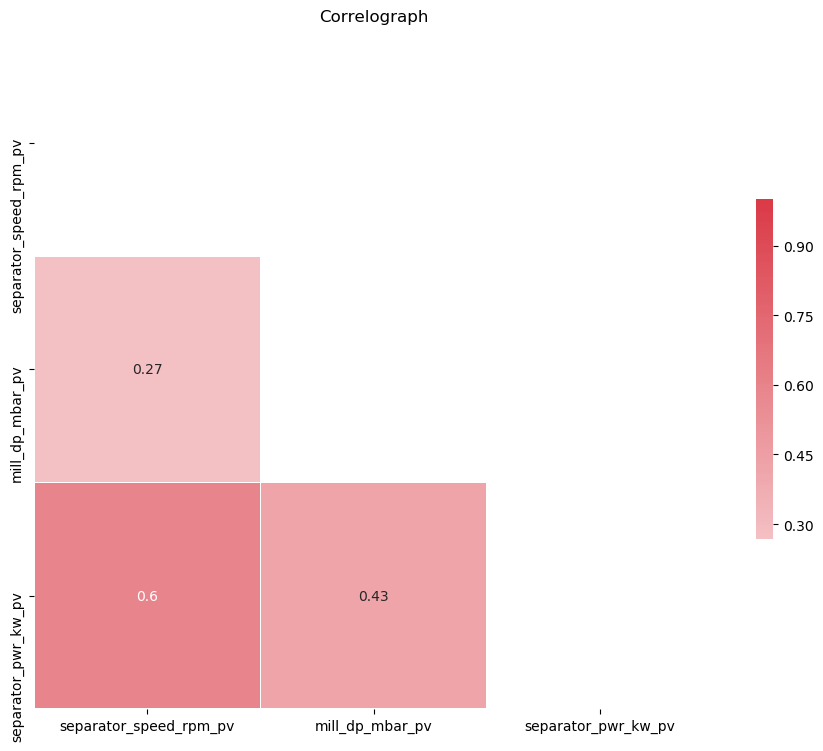

In [5]:
# Compute the correlation matrix
corr = dfc1.iloc[:, [0,1,-1]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9), dpi=100)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlograph')

In [8]:
descr = ['mill_dp_mbar_pv', 'separator_speed_rpm_pv','separator_pwr_kw_pv'
         'lag1', 'lag2']

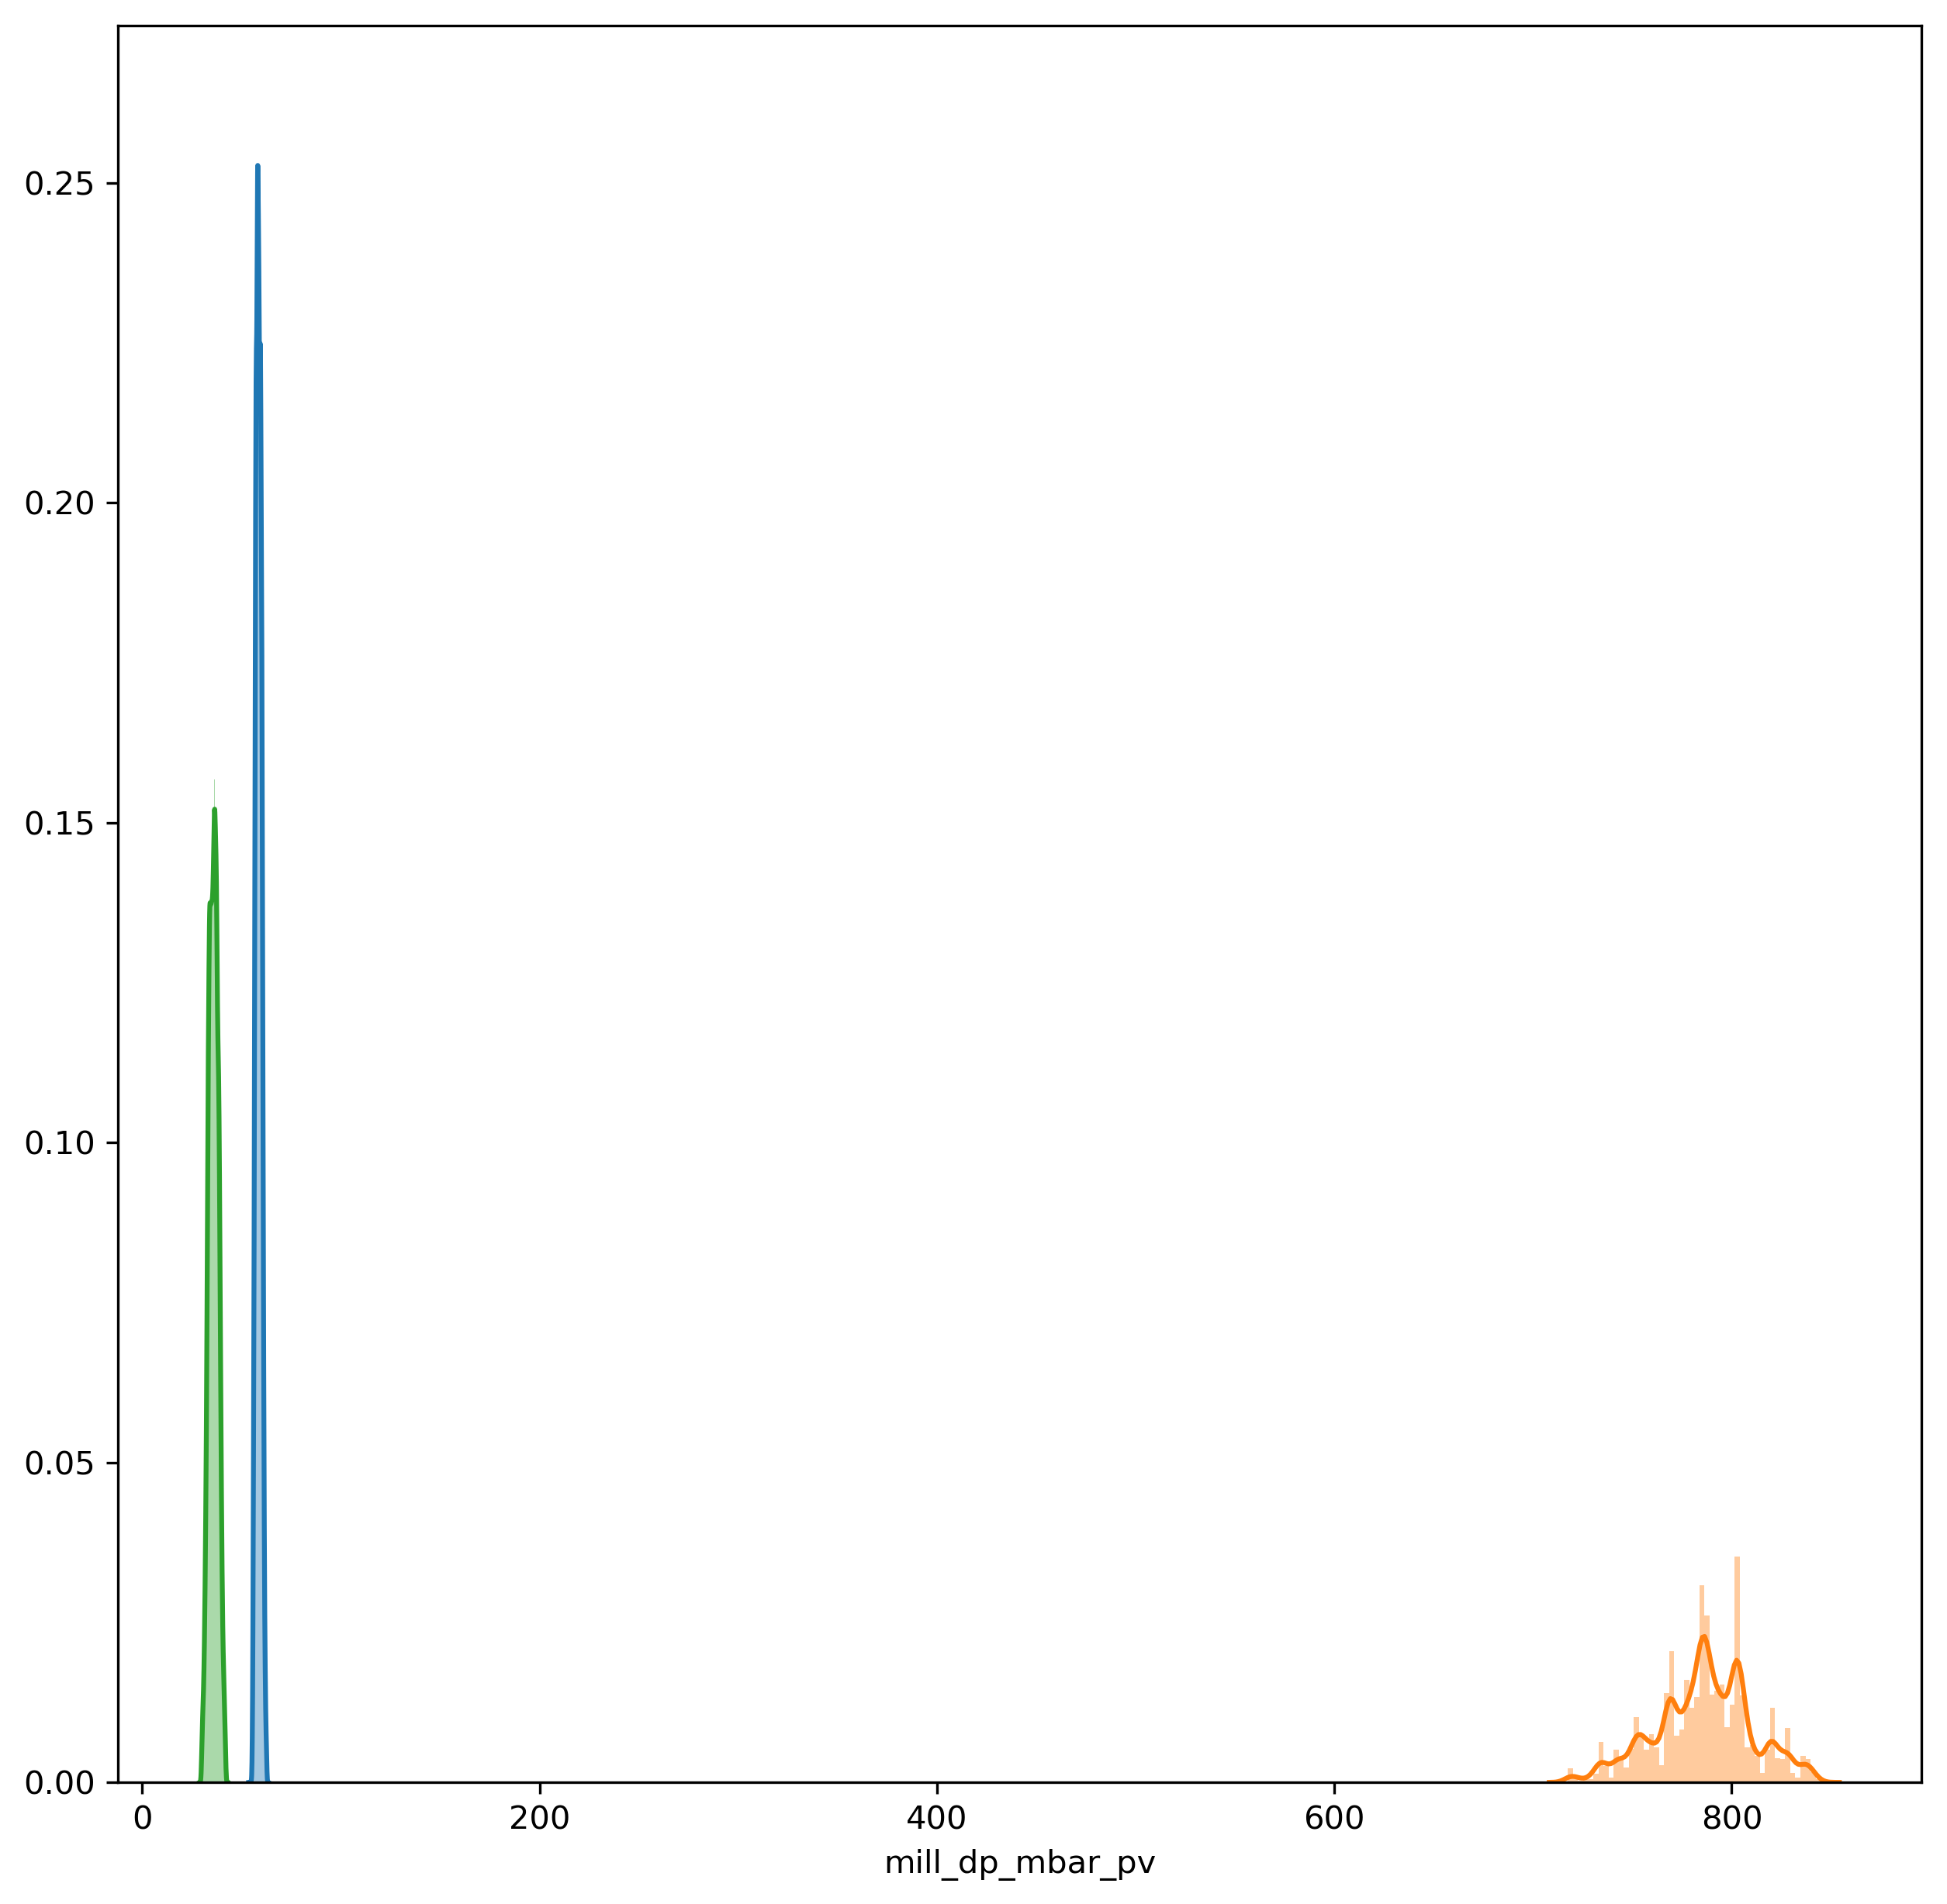

In [6]:
fig, ax = plt.subplots(figsize = (10,10), dpi=300) 


sns.distplot(dfc1['separator_pwr_kw_pv'], label='separator_pwr_kw_pv')
sns.distplot(dfc1['separator_speed_rpm_pv'], label='separator_speed_rpm_pv')
sns.distplot(dfc1['mill_dp_mbar_pv'], label='mill_dp_mbar_pv')



In [8]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Cement type I

## Split data set

In [9]:
x = dfc1.drop('separator_pwr_kw_pv', axis=1).values
y = dfc1['separator_pwr_kw_pv'].values

x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.3)

x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

((24881, 4), (10664, 4), (24881,), (10664,))

## Feature Scaling 

In [10]:
sc = StandardScaler()


x_tr_sc = sc.fit_transform(x_tr)
x_ts_sc = sc.transform(x_ts)

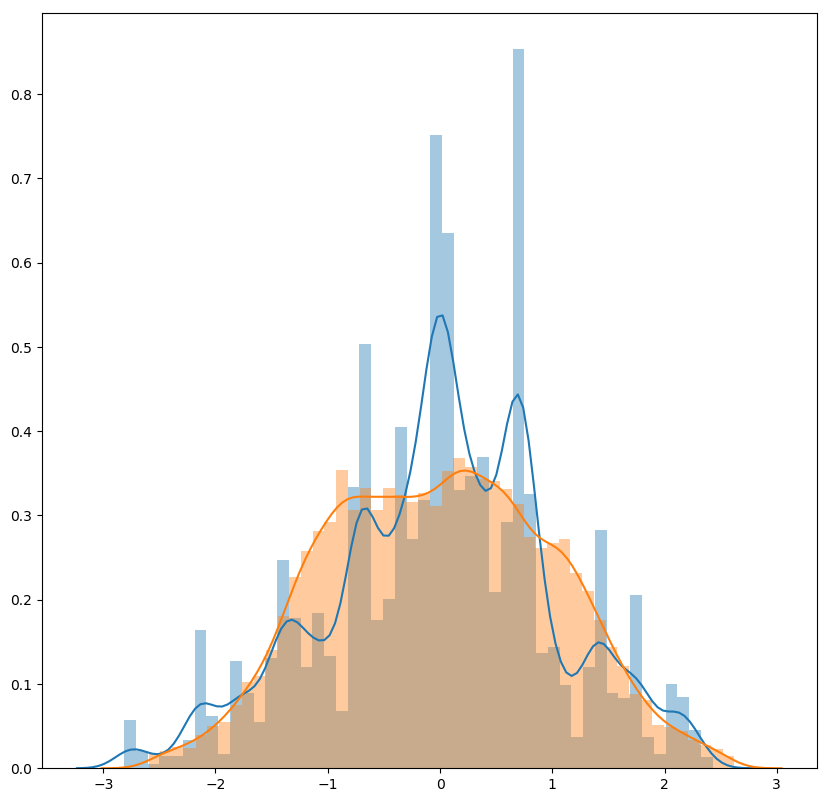

In [7]:
fig, ax = plt.subplots(figsize = (10,10), dpi=100)
for i in range(2):
    sns.distplot(x_tr_sc[:, i])

## Linear Regressions

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV


In [12]:
# Simple linear Regression 

scaler = StandardScaler()
linear = LinearRegression()


pipe_linear = Pipeline([('standarizer', scaler),('regressor', linear)])
pipe_linear.fit(x_tr, y_tr)
lr_preds = pipe_linear.predict(x_ts)

lr_mae = mean_absolute_error(y_ts, lr_preds)
lr_mse = mean_squared_error(y_ts, lr_preds)
lr_r2 = r2_score(y_ts, lr_preds, multioutput='variance_weighted')

print('Linear Regression metrics : MAE = {}, MSE = {}, R^2 = {}'.format(lr_mae, lr_mse, lr_r2))







Linear Regression metrics : MAE = 0.296828872016974, MSE = 0.15558118440261268, R^2 = 0.9184557552762228


In [13]:
# Lasso Regression 

param_grid1 = {'alpha': [0.1, 0.25, 0.5, 0.75, 0.9, 1, 1.1, 1.5, 2, 5, 10]}
las_reg = GridSearchCV(Lasso(), param_grid1, cv=5)
las_reg.fit(x_tr_sc, y_tr)
las_preds = las_reg.predict(x_ts_sc)


las_mae = mean_absolute_error(y_ts, las_preds)
las_mse = mean_squared_error(y_ts, las_preds)
las_r2 = r2_score(y_ts, las_preds, multioutput='variance_weighted')

print('Lasso Regression metrics : MAE = {}, MSE = {}, R^2 = {}'.format(las_mae, las_mse, las_r2))

Lasso Regression metrics : MAE = 0.3090643840703378, MSE = 0.16580785436614037, R^2 = 0.9130956850246866


In [14]:
# Ridge Regression 

param_grid = {'alpha': [0.1, 0.25, 0.5, 0.75, 0.9, 1, 1.1, 1.5, 2, 5, 10]}
rid_reg = GridSearchCV(Ridge(), param_grid, cv=5)
rid_reg.fit(x_tr_sc, y_tr)
rid_preds = rid_reg.predict(x_ts_sc)


rid_mae = mean_absolute_error(y_ts, rid_preds)
rid_mse = mean_squared_error(y_ts, rid_preds)
rid_r2 = r2_score(y_ts, rid_preds, multioutput='variance_weighted')

print('Ridge Regression metrics : MAE = {}, MSE = {}, R^2 = {}'.format(rid_mae, rid_mse, rid_r2))

Ridge Regression metrics : MAE = 0.29682743686608437, MSE = 0.1555790868731871, R^2 = 0.9184568546472903


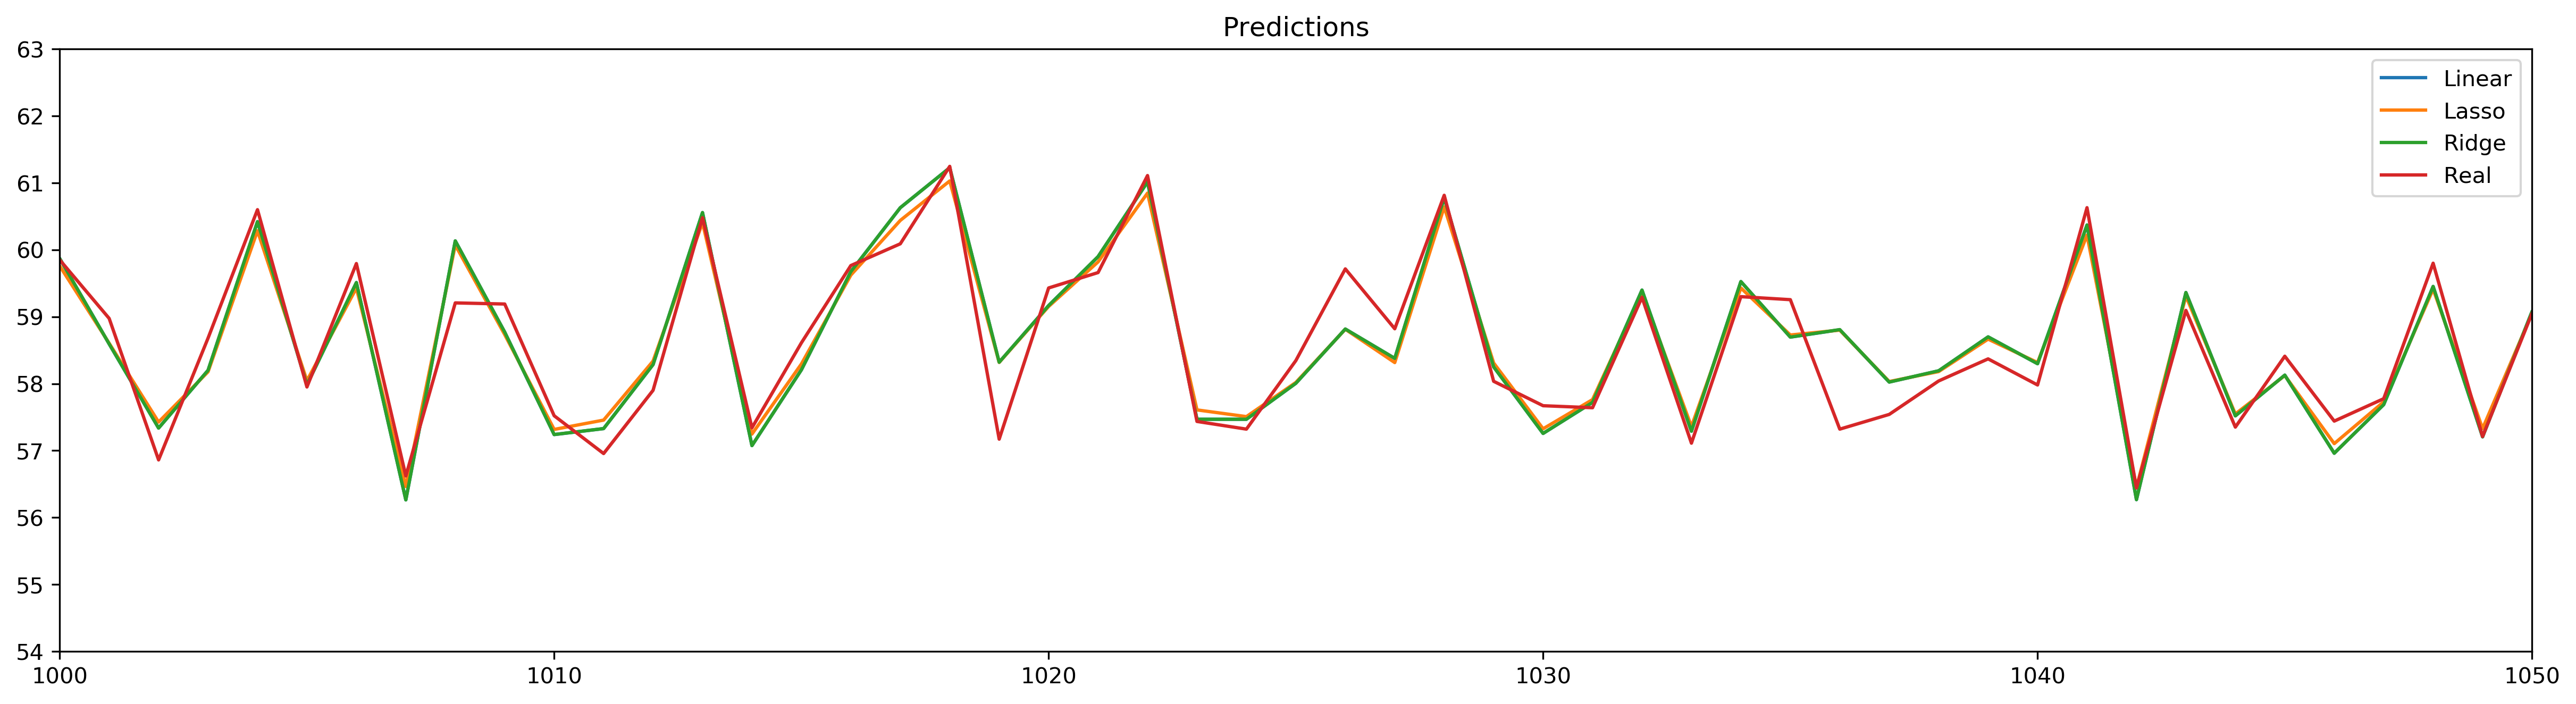

In [20]:
plt.figure(figsize=(20, 5), dpi=300)

plt.plot(range(len(y_ts)), lr_preds, label='Linear')
plt.plot(range(len(y_ts)), las_preds, label='Lasso')
plt.plot(range(len(y_ts)), rid_preds, label='Ridge')
plt.plot(range(len(y_ts)),y_ts, label='Real')


plt.title('Predictions')
plt.xlim(1000, 1050)
plt.ylim(54, 63)

plt.legend()

## Save Trained Models

In [8]:
import pickle as pkl 

## Decision Tree 

In [22]:
from sklearn.tree import DecisionTreeRegressor


param_grid = {'criterion': ['mse', 'mae'],
              'max_depth': [None, 6, 5, 4, 3],
              'min_samples_split': [2, 4, 6, 8, 10]}

dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=2)
dt.fit(x_tr_sc, y_tr)
dt_preds = dt.predict(x_ts_sc)

dt_mae = mean_absolute_error(y_ts, dt_preds)
dt_mse = mean_squared_error(y_ts, dt_preds)
dt_r2 = r2_score(y_ts, dt_preds, multioutput='variance_weighted')

print('Decision Tree:     ', dt_mae, dt_mse, dt_r2)

Decision Tree:      0.29319393536086613 0.1587671482415844 0.9179014781715331


In [23]:
print('Decision Tree metrics : MAE = {}, MSE = {}, R^2 = {}'.format(dt_mae, dt_mse, dt_r2))

Decision Tree metrics : MAE = 0.29319393536086613, MSE = 0.1587671482415844, R^2 = 0.9179014781715331


In [27]:
dt_preds=dt_preds

pkl.dump(dt, open('dt_regressor.pkl', 'wb'))

(54, 62)

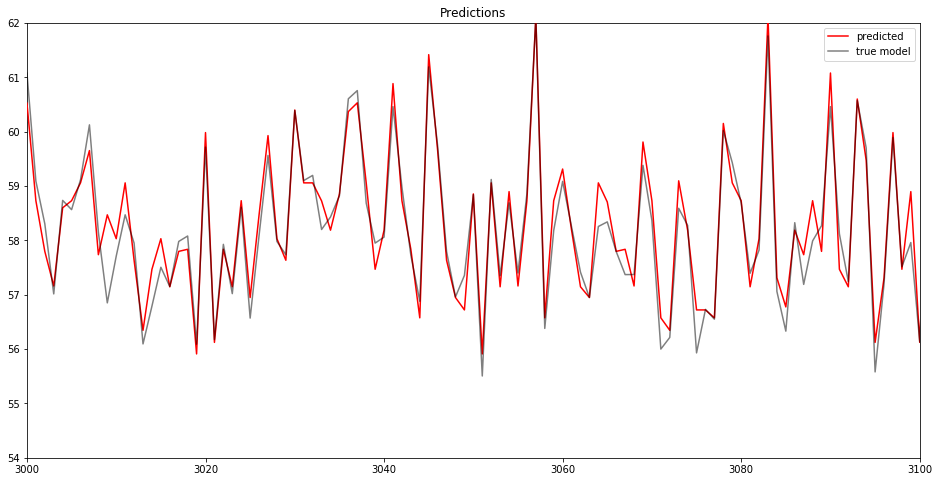

In [25]:
plt.figure(figsize = (16,8))
plt.errorbar(dt_preds, y_ts, fmt='o')
plt.plot(dt_preds, '-r', label = 'predicted', zorder = 10)
plt.plot(y_ts , '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()


plt.title('Predictions')
plt.xlim(3000, 3100)
plt.ylim(54,62)

## Random Forest 

In [28]:
param_grid = {'max_depth': [3, 5, 7, None],         
              'n_estimators': (10, 50, 100, 1000),
              'criterion' : ['mse']
             }                                           
   

rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=2, verbose=1)

grid_result = rf.fit(x_tr_sc, y_tr)

best_params = grid_result.best_params_

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  7.5min finished


In [29]:
best_params

{'criterion': 'mse', 'max_depth': 7, 'n_estimators': 1000}

In [30]:
rf_preds = rf.predict(x_ts_sc)


rf_mae = mean_absolute_error(y_ts, rf_preds)
rf_mse = mean_squared_error(y_ts, rf_preds)
rf_r2 = r2_score(y_ts, rf_preds, multioutput='variance_weighted')

                            
print('Random Forest : MAE = {}, MSE = {}, R^2 = {}'.format(rf_mae, rf_mse, rf_r2))

Random Forest : MAE = 0.2821335601426618, MSE = 0.1481985366471449, R^2 = 0.9233665091889223


In [32]:
rf_preds=rf_preds
pkl.dump(rf, open('rf_regressor.pkl', 'wb'))

(55, 62)

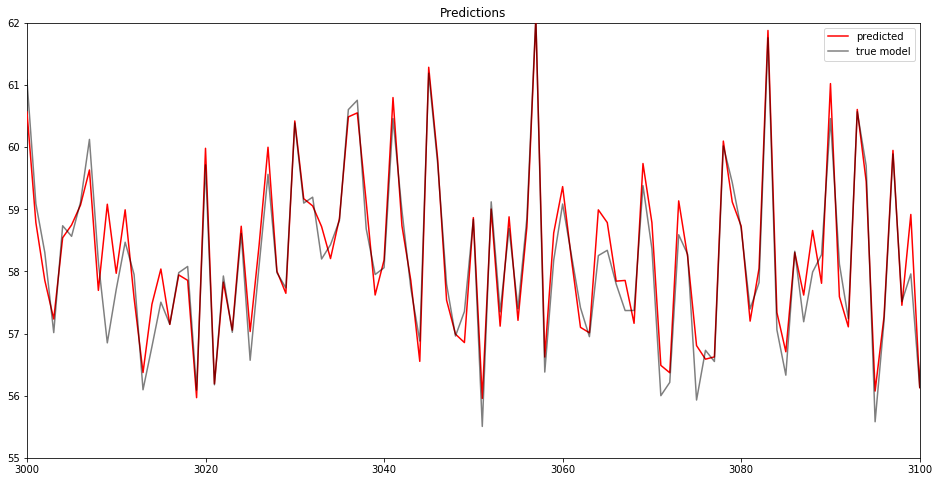

In [33]:
plt.figure(figsize = (16,8))
plt.errorbar(rf_preds, y_ts, fmt='o')
plt.plot(rf_preds, '-r', label = 'predicted', zorder = 10)
plt.plot(y_ts , '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()


plt.title('Predictions')
plt.xlim(3000, 3100)
plt.ylim(55,62)

## Xg Boost 

In [9]:
import xgboost as xgb # pip install xgboost

In [10]:
parameters = {'n_estimators': [120, 100, 140], 'max_depth':[3,5,7,9], 'learning_rate': [0.01,0.05,0.1]}
xg = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=parameters, cv=2, n_jobs=-1)

#xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.5,
#                           colsample_bytree=1, max_depth=7)


In [11]:
xg.fit(x_tr_sc,y_tr)

[23:56:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [120, 100, 140], 'max_depth': [3, 5, 7, 9], 'learning_rate': [0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
xgb_preds = xg.predict(x_ts_sc)

In [13]:
xg_mae = mean_absolute_error(y_ts, xgb_preds)
xg_mse = mean_squared_error(y_ts, xgb_preds)
xg_r2 = r2_score(y_ts, xgb_preds, multioutput='variance_weighted')
                   
print('Xg Boost : MAE = {}, MSE = {}, R^2 = {}'.format(xg_mae, xg_mse, xg_r2)) 

Xg Boost : MAE = 0.275412964967049, MSE = 0.13752565945282777, R^2 = 0.9290320785441905


In [16]:
xgb_preds=xgb_preds
xgb_preds.shape

(10664,)

In [18]:
import pickle as pkl

In [19]:

pkl.dump(xg, open('xg_regressor_c1.pkl', 'wb'))

## LGBM Regressor 

In [39]:
import lightgbm as lgb  # pip install lightgbm 
from lightgbm import LGBMRegressor

In [40]:
lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.01, n_estimators=1000, max_bin=255, subsample_for_bin=50000, objective=None, 
                      min_split_gain=0, min_child_weight=3,min_child_samples=10, subsample=1, subsample_freq=1, colsample_bytree=1, reg_alpha=0.1, 
                      reg_lambda=0, seed=17,silent=False, nthread=-1)

In [41]:
lgbm.fit(x_tr_sc, y_tr, eval_metric='mse',eval_set=[(x_tr_sc, y_tr)],verbose = True)

[1]	training's l2: 1.90551
[2]	training's l2: 1.8706
[3]	training's l2: 1.83638
[4]	training's l2: 1.80285
[5]	training's l2: 1.76999
[6]	training's l2: 1.73777
[7]	training's l2: 1.70619
[8]	training's l2: 1.67524
[9]	training's l2: 1.6449
[10]	training's l2: 1.61516
[11]	training's l2: 1.58601
[12]	training's l2: 1.55744
[13]	training's l2: 1.52944
[14]	training's l2: 1.50199
[15]	training's l2: 1.47508
[16]	training's l2: 1.4487
[17]	training's l2: 1.42286
[18]	training's l2: 1.39752
[19]	training's l2: 1.37268
[20]	training's l2: 1.34834
[21]	training's l2: 1.32448
[22]	training's l2: 1.30107
[23]	training's l2: 1.27815
[24]	training's l2: 1.25566
[25]	training's l2: 1.23362
[26]	training's l2: 1.21201
[27]	training's l2: 1.19084
[28]	training's l2: 1.17008
[29]	training's l2: 1.14973
[30]	training's l2: 1.12978
[31]	training's l2: 1.11023
[32]	training's l2: 1.09108
[33]	training's l2: 1.07229
[34]	training's l2: 1.05387
[35]	training's l2: 1.03584
[36]	training's l2: 1.01815
[37]

[298]	training's l2: 0.137434
[299]	training's l2: 0.137307
[300]	training's l2: 0.137185
[301]	training's l2: 0.137063
[302]	training's l2: 0.136946
[303]	training's l2: 0.136829
[304]	training's l2: 0.136718
[305]	training's l2: 0.136606
[306]	training's l2: 0.136491
[307]	training's l2: 0.136381
[308]	training's l2: 0.13627
[309]	training's l2: 0.136163
[310]	training's l2: 0.136058
[311]	training's l2: 0.135953
[312]	training's l2: 0.135854
[313]	training's l2: 0.135756
[314]	training's l2: 0.135656
[315]	training's l2: 0.13556
[316]	training's l2: 0.13547
[317]	training's l2: 0.13537
[318]	training's l2: 0.13528
[319]	training's l2: 0.135186
[320]	training's l2: 0.135096
[321]	training's l2: 0.135008
[322]	training's l2: 0.134922
[323]	training's l2: 0.134832
[324]	training's l2: 0.134752
[325]	training's l2: 0.134669
[326]	training's l2: 0.134584
[327]	training's l2: 0.1345
[328]	training's l2: 0.13442
[329]	training's l2: 0.134343
[330]	training's l2: 0.134264
[331]	training's l

[606]	training's l2: 0.125809
[607]	training's l2: 0.125793
[608]	training's l2: 0.125782
[609]	training's l2: 0.125762
[610]	training's l2: 0.125746
[611]	training's l2: 0.12573
[612]	training's l2: 0.12571
[613]	training's l2: 0.125698
[614]	training's l2: 0.125683
[615]	training's l2: 0.125662
[616]	training's l2: 0.125646
[617]	training's l2: 0.125626
[618]	training's l2: 0.125615
[619]	training's l2: 0.125599
[620]	training's l2: 0.125579
[621]	training's l2: 0.125563
[622]	training's l2: 0.125544
[623]	training's l2: 0.12553
[624]	training's l2: 0.125514
[625]	training's l2: 0.125493
[626]	training's l2: 0.125476
[627]	training's l2: 0.125464
[628]	training's l2: 0.125448
[629]	training's l2: 0.125427
[630]	training's l2: 0.125411
[631]	training's l2: 0.125391
[632]	training's l2: 0.125375
[633]	training's l2: 0.125356
[634]	training's l2: 0.125341
[635]	training's l2: 0.125326
[636]	training's l2: 0.125308
[637]	training's l2: 0.12529
[638]	training's l2: 0.125273
[639]	training

[916]	training's l2: 0.121699
[917]	training's l2: 0.121683
[918]	training's l2: 0.121671
[919]	training's l2: 0.121657
[920]	training's l2: 0.121651
[921]	training's l2: 0.121644
[922]	training's l2: 0.121636
[923]	training's l2: 0.121625
[924]	training's l2: 0.121614
[925]	training's l2: 0.121603
[926]	training's l2: 0.121585
[927]	training's l2: 0.121571
[928]	training's l2: 0.121559
[929]	training's l2: 0.121553
[930]	training's l2: 0.121547
[931]	training's l2: 0.121527
[932]	training's l2: 0.121516
[933]	training's l2: 0.121504
[934]	training's l2: 0.121493
[935]	training's l2: 0.121483
[936]	training's l2: 0.121471
[937]	training's l2: 0.121461
[938]	training's l2: 0.121447
[939]	training's l2: 0.121432
[940]	training's l2: 0.121419
[941]	training's l2: 0.121413
[942]	training's l2: 0.121407
[943]	training's l2: 0.121398
[944]	training's l2: 0.12138
[945]	training's l2: 0.121369
[946]	training's l2: 0.121355
[947]	training's l2: 0.121345
[948]	training's l2: 0.121325
[949]	train

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
       importance_type='split', learning_rate=0.01, max_bin=255,
       max_depth=-1, min_child_samples=10, min_child_weight=3,
       min_split_gain=0, n_estimators=1000, n_jobs=-1, nthread=-1,
       num_leaves=31, objective=None, random_state=None, reg_alpha=0.1,
       reg_lambda=0, seed=17, silent=False, subsample=1,
       subsample_for_bin=50000, subsample_freq=1)

In [67]:
lgbm_preds = model.predict(x_ts_sc)

lgbm_mae = mean_absolute_error(y_ts, lgbm_preds)
lgbm_mse = mean_squared_error(y_ts, lgbm_preds)
lgbm_r2 = r2_score(y_ts, lgbm_preds, multioutput='variance_weighted')
print('LGBM : MAE = {}, MSE = {}, R^2 = {}'.format(lgbm_mae, lgbm_mse, lgbm_r2))

LGBM : MAE = 0.27925858402665604, MSE = 0.14361258066521615, R^2 = 0.9257379078784919


In [8]:
lgbm_preds=lgbm_preds

pkl.dump(lgbm, open('lgbm_regressor.pkl', 'wb'))

(55, 62)

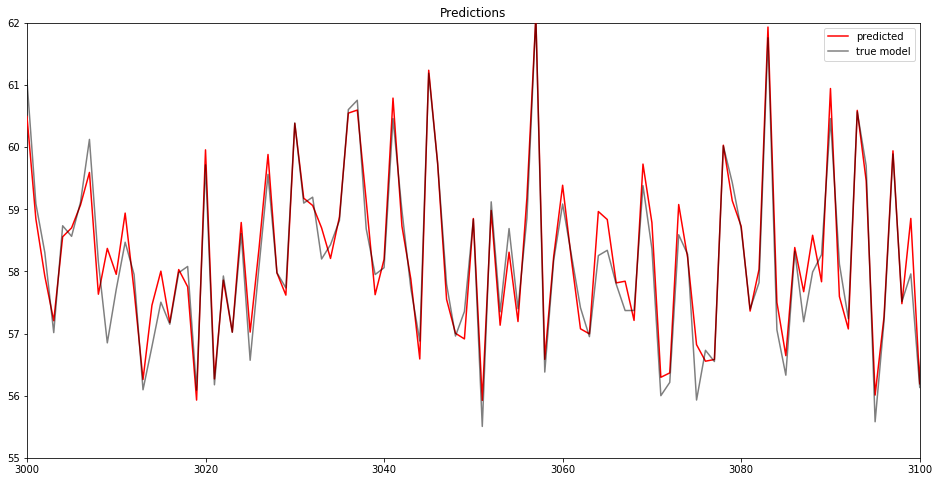

In [47]:
plt.figure(figsize = (16,8))
#plt.errorbar(x_ts, y_ts, fmt='o')
plt.plot(lgbm_preds, '-r', label = 'predicted', zorder = 10)
plt.plot(y_ts , '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()


plt.title('Predictions')
plt.xlim(3000, 3100)
plt.ylim(55,62)

# ANN (MLP Regression)

In [48]:
from sklearn.neural_network import MLPRegressor

In [15]:
'''
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter = 2000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', random_state = 8)
                   
'''

In [49]:
param_grid = {'hidden_layer_sizes': (100,200,300),         
              'solver': ['lbfgs', 'sgd', 'adam']
             }                                           
   

mlp = GridSearchCV(MLPRegressor(), param_grid, cv=2, verbose=1)


grid_result = mlp.fit(x_tr_sc,y_tr)

best_params = grid_result.best_params_

mlp.fit(x_tr_sc,y_tr)

mlp_preds = mlp.predict(x_ts_sc)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  9.6min finished


Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  9.3min finished


In [50]:

pkl.dump(mlp, open('mlp_regressor.pkl', 'wb'))

In [51]:

mlp_mae = mean_absolute_error(y_ts, mlp_preds)
mlp_mse = mean_squared_error(y_ts, mlp_preds)
mlp_r2 = r2_score(y_ts, mlp_preds, multioutput='variance_weighted')
print('MLP : MAE = {}, MSE = {}, R^2 = {}'.format(mlp_mae, mlp_mse, mlp_r2))

MLP : MAE = 0.2923042466519729, MSE = 0.153140585600726, R^2 = 0.9208109747576081


(55, 62)

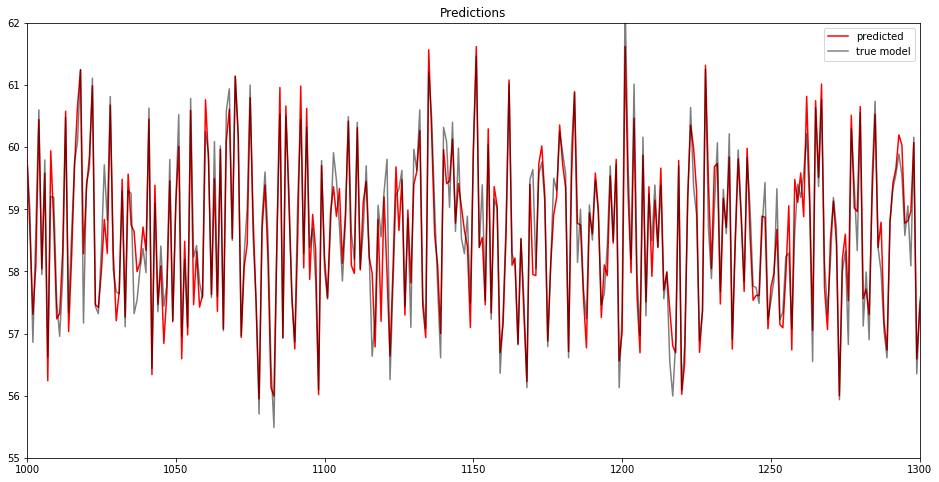

In [52]:

plt.figure(figsize = (16,8))
#plt.errorbar(mlp_preds, y_ts, fmt='o')
plt.plot(mlp_preds, '-r', label = 'predicted', zorder = 10)
plt.plot(y_ts , '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()


plt.title('Predictions')
plt.xlim(1000, 1300)
plt.ylim(55,62)

## SVR 

In [53]:
from sklearn.svm import SVR

In [54]:
param_grid = {'kernel': ['rbf','poly','sigmoid'],         
              'C': (2, 3, 10)
             }                                           
   

svr = GridSearchCV(SVR(), param_grid, cv=2, verbose=1)


# Train the model 
grid_result = svr.fit(x_tr_sc,y_tr)

best_params = grid_result.best_params_

# Predict 

svr_preds = svr.predict(x_ts_sc)


svr_preds =svr_preds
svr_preds.shape

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 15.1min finished


(10664,)

In [55]:
pkl.dump(svr, open('svr_regressor.pkl', 'wb'))

In [56]:

svr_mae = mean_absolute_error(y_ts, svr_preds)
svr_mse = mean_squared_error(y_ts, svr_preds)
svr_r2 = r2_score(y_ts, svr_preds, multioutput='variance_weighted')
print('SVR : MAE = {}, MSE = {}, R^2 = {}'.format(svr_mae, svr_mse, svr_r2))

SVR : MAE = 0.2862098013958466, MSE = 0.15017493947291302, R^2 = 0.922344510920828


(55, 62)

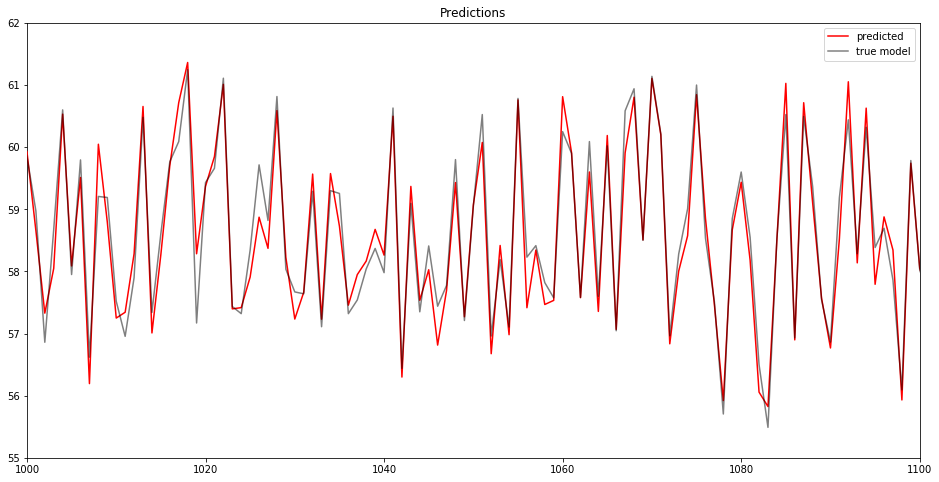

In [57]:
plt.figure(figsize = (16,8))
plt.errorbar(svr_preds, y_ts, fmt='o')
plt.plot(svr_preds, '-r', label = 'predicted', zorder = 10)
plt.plot(y_ts , '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()


plt.title('Predictions')
plt.xlim(1000, 1100)
plt.ylim(55,62)

## KNN Regressor

In [63]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': [3, 5, 7, 11],
              'weights' : ['uniform', 'distance']
             }
knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=2, verbose=1)
knn.fit(x_tr_sc, y_tr)
knn_preds = knn.predict(x_ts_sc)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    7.5s finished


In [66]:
knn_mae = mean_absolute_error(y_ts, knn_preds)
knn_mse = mean_squared_error(y_ts, knn_preds)
knn_r2 = r2_score(y_ts, knn_preds, multioutput='variance_weighted')
print('KNN : MAE = {}, MSE = {}, R^2 = {}'.format(knn_mae, knn_mse, knn_r2))

KNN : MAE = 0.288141212651764, MSE = 0.15375501935542402, R^2 = 0.9204932509489934


In [65]:
knn_preds = knn_preds

pkl.dump(svr, open('knn_regressor.pkl', 'wb'))

## All model metrics for comparison 

In [68]:

print('Linear Regression metrics : MAE = {}, MSE = {}, R^2 = {}'.format(lr_mae, lr_mse, lr_r2))
print('Lasso Regression metrics : MAE = {}, MSE = {}, R^2 = {}'.format(las_mae, las_mse, las_r2))
print('Ridge Regression metrics : MAE = {}, MSE = {}, R^2 = {}'.format(rid_mae, rid_mse, rid_r2))
print('Decision Tree metrics : MAE = {}, MSE = {}, R^2 = {}'.format(dt_mae, dt_mse, dt_r2))
print('Random Forest : MAE = {}, MSE = {}, R^2 = {}'.format(rf_mae, rf_mse, rf_r2))
print('Xg Boost : MAE = {}, MSE = {}, R^2 = {}'.format(xg_mae, xg_mse, xg_r2)) 
print('LGBM : MAE = {}, MSE = {}, R^2 = {}'.format(lgbm_mae, lgbm_mse, lgbm_r2))
print('MLP : MAE = {}, MSE = {}, R^2 = {}'.format(mlp_mae, mlp_mse, mlp_r2))
print('SVR : MAE = {}, MSE = {}, R^2 = {}'.format(svr_mae, svr_mse, svr_r2))
print('kNN : MAE = {}, MSE = {}, R^2 = {}'.format(knn_mae, knn_mse, knn_r2))

Linear Regression metrics : MAE = 0.2977287994805329, MSE = 0.1579025750548649, R^2 = 0.9183485491268809
Lasso Regression metrics : MAE = 0.3124561770988015, MSE = 0.16934889335232622, R^2 = 0.9124296558104261
Ridge Regression metrics : MAE = 0.29772743319644435, MSE = 0.15789993910656908, R^2 = 0.918349912176234
Decision Tree metrics : MAE = 0.29319393536086613, MSE = 0.1587671482415844, R^2 = 0.9179014781715331
Random Forest : MAE = 0.2821335601426618, MSE = 0.1481985366471449, R^2 = 0.9233665091889223
LGBM : MAE = 0.27925858402665604, MSE = 0.14361258066521615, R^2 = 0.9257379078784919
MLP : MAE = 0.2923042466519729, MSE = 0.153140585600726, R^2 = 0.9208109747576081
SVR : MAE = 0.2862098013958466, MSE = 0.15017493947291302, R^2 = 0.922344510920828
kNN : MAE = 0.288141212651764, MSE = 0.15375501935542402, R^2 = 0.9204932509489934


## Plot of absolute error for Model comparison 

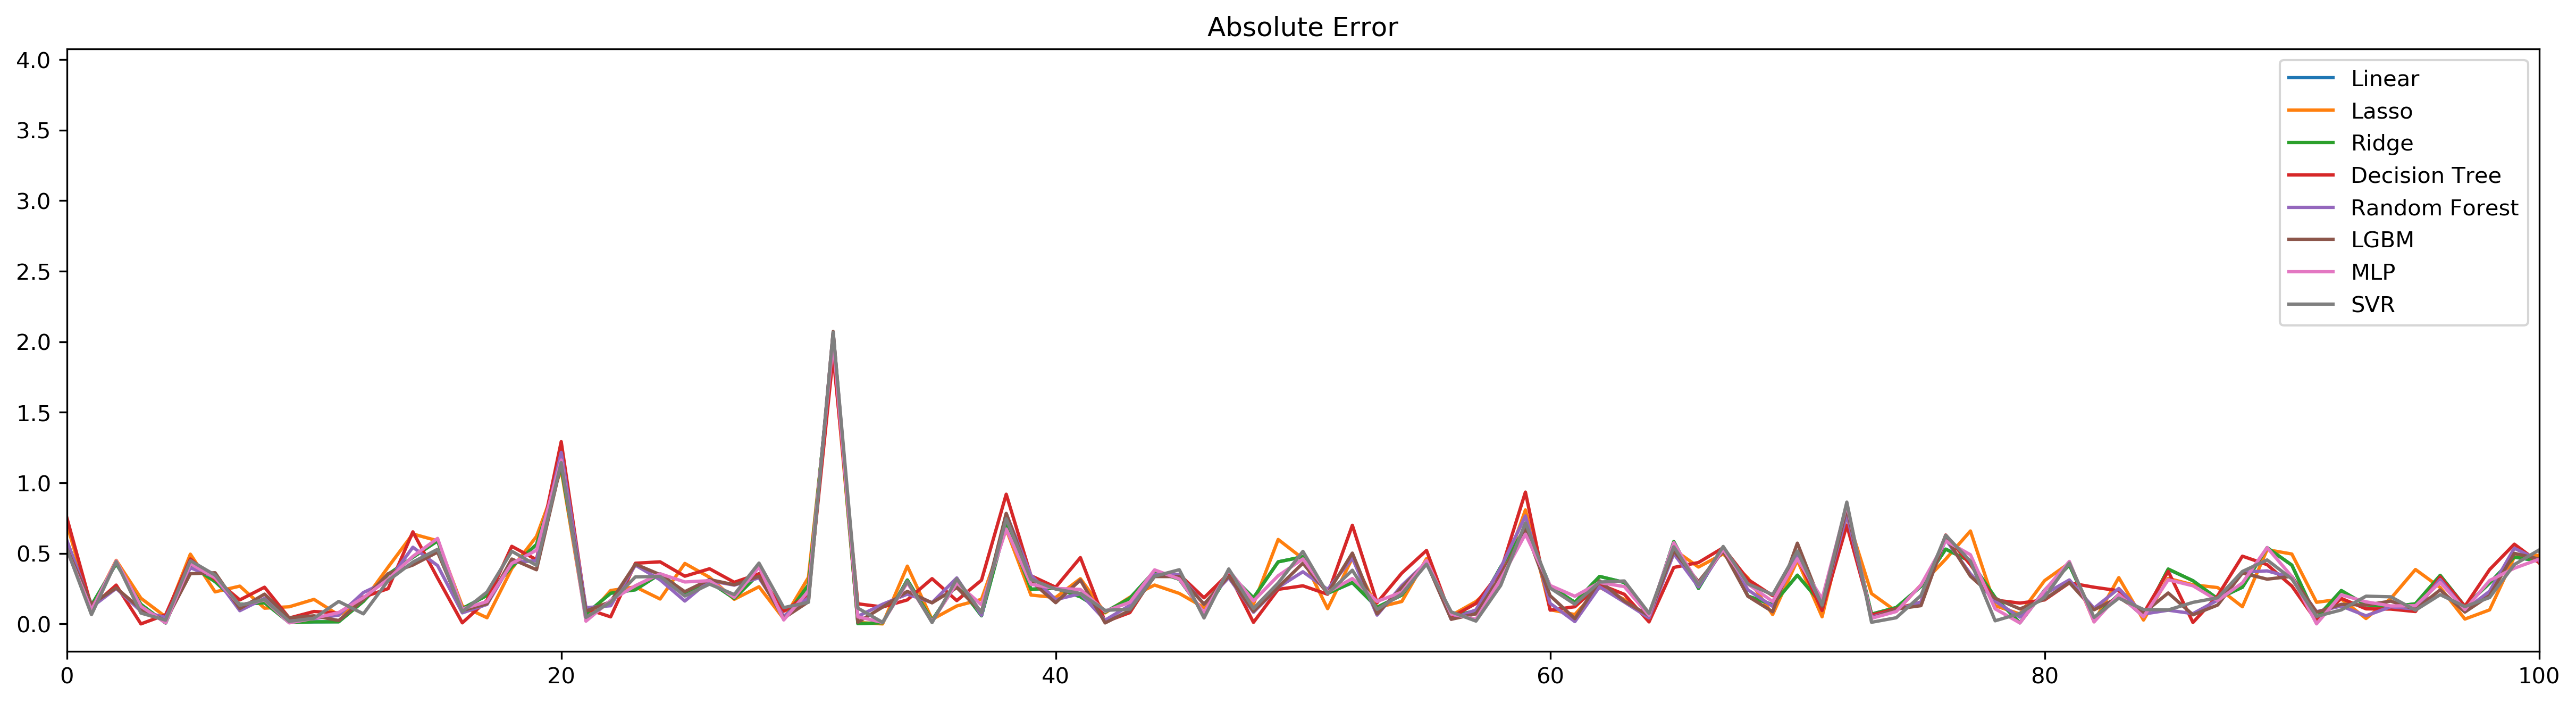

In [99]:
plt.figure(figsize=(20, 5), dpi=300)

plt.plot(range(len(y_ts)), np.abs(lr_preds - y_ts), label='Linear')
plt.plot(range(len(y_ts)), np.abs(las_preds - y_ts), label='Lasso')
plt.plot(range(len(y_ts)), np.abs(rid_preds - y_ts), label='Ridge')
plt.plot(range(len(y_ts)), np.abs(dt_preds - y_ts), label='Decision Tree')
plt.plot(range(len(y_ts)), np.abs(rf_preds - y_ts), label='Random Forest')
plt.plot(range(len(y_ts)), np.abs(lgbm_preds - y_ts), label='LGBM')
plt.plot(range(len(y_ts)), np.abs(mlp_preds - y_ts), label='MLP')
plt.plot(range(len(y_ts)), np.abs(svr_preds - y_ts), label='SVR')

plt.title('Absolute Error')
plt.xlim(0, 100)
#plt.ylim(0, 5)

plt.legend()

## Multimodel

In [54]:
x_stack = x_ts # x_ts is from the first split 
y_stack = y_ts

x_tr_val, x_ts_stack, y_tr_val, y_ts_stack = train_test_split(x_ts, y_ts, test_size=0.5)

x_tr_val.shape, x_ts_stack.shape, y_tr_val.shape, y_ts_stack.shape

((3617, 13), (3617, 13), (3617,), (3617,))

## Upload Models

In [5]:
import pickle as pkl 
# import models 



lgbm = pkl.load(open('lgbm_regressor_c1.pkl','rb'))
rf = pkl.load(open('rf_regressor_c1.pkl','rb'))
svr = pkl.load(open('svr_regressor_c1.pkl','rb'))
xg = pkl.load(open('xg_regressor_c1.pkl','rb'))


[21:14:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
lgbm_preds = lgbm.predict(x_ts_sc)
rf_preds = rf.predict(x_ts_sc)
svr_preds = svr.predict(x_ts_sc)
xg_preds = xg.predict(x_ts_sc)

(55, 62)

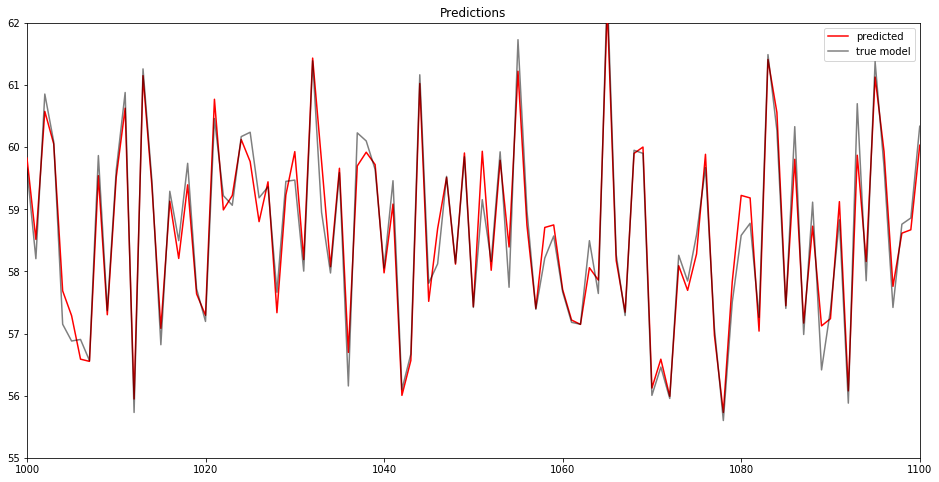

In [11]:
lgbm_preds = lgbm.predict(x_ts_sc)

plt.figure(figsize = (16,8))
#plt.errorbar(lgbm_preds, y_ts, fmt='o')
plt.plot(lgbm_preds, '-r', label = 'predicted', zorder = 10)
plt.plot(y_ts , '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()


plt.title('Predictions')
plt.xlim(1000, 1100)
plt.ylim(55,62)


In [12]:
# First idea 

w1 = 0.25
w2 = 0.25
w3 = 0.25
w4 = 0.25


# y_st stands for y stack estimation (the mean of the best estimations)
# y_r stands for the best regression estimator prediction 
# y_rf stands for the random forest predictions 
# y_bst stands for the best boosted estimator prediction 

y_st_preds = w1*lgbm_preds+w2*svr_preds+w3*rf_preds+w4*xg_preds


st1_mae = mean_absolute_error(y_ts, y_st_preds)
st1_mse = mean_squared_error(y_ts, y_st_preds)
st1_r2 = r2_score(y_ts, y_st_preds, multioutput='variance_weighted')
print('Multimodel : MAE = {}, MSE = {}, R^2 = {}'.format(st1_mae, st1_mse, st1_r2))

Multimodel : MAE = 0.26741028490468544, MSE = 0.12902029940068857, R^2 = 0.9331260780032841


(1000, 1100)

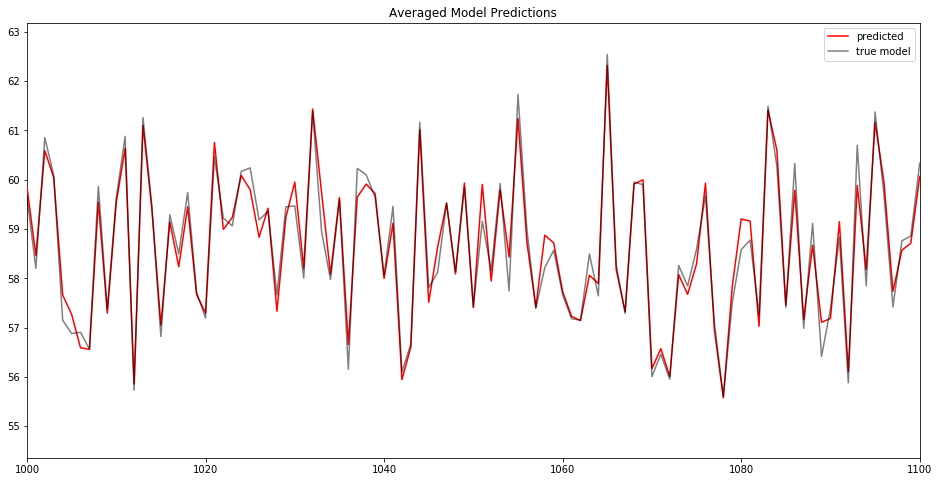

In [22]:
plt.figure(figsize = (16,8))
#plt.errorbar(y_st_preds, y_ts, fmt='o')
plt.plot(y_st_preds, '-r', label = 'predicted', zorder = 10)
plt.plot(y_ts , '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()


plt.title('Averaged Model Predictions')
plt.xlim(1000, 1100)
#plt.ylim(30,42)

In [12]:
# Second idea 

accuracy=[]

# y_st stands for y stack estimation (the mean of the best estimations)
# y_r stands for the best regression estimator prediction 
# y_rf stands for the random forest predictions 
# y_bst stands for the best boosted estimator prediction 



# put all the models

#y_st_preds = w1*dt_preds+w2*svr_preds+w3*rf_preds+w4*mlp_preds


#Initialize w 
#w1+w2+w3=1



# Train the metamodel in validation set 

for i in np.arange(0.01, 1.0, 0.05):
    for j in np.arange(0.001, 1.0, 0.05):
        for k in np.arange(0.01, 1.0, 0.05):
            for n in np.arange(0.01, 1.0, 0.05):
                    
                m = i + j + k + n
                w1 = i / m
                w2 = j / m
                w3 = k / m
                w4 = n / m
                   
                y_st_preds = w1*lgbm_preds+w2*svr_preds+w3*rf_preds+w4*xg_preds
                mse = mean_squared_error(y_ts, y_st_preds)
                accuracy.append((mse, i, j, k, n))

                     
                        
se=[]


for elements in accuracy:
    se.append(elements[0]) 
    
    
se =pd.Series(se)

se_min = se.min()


for elements in se:
    if elements == se_min:
        mse_min = elements
    
                

print('The min mse y_st estimator is {}'.format(mse_min))



The min mse y_st estimator is 0.12232916291892834


In [13]:
for elements in accuracy:
    if elements[0]==se_min:
        bestfit = elements
bestfit
(i,j,k,n)= bestfit[1:]

In [14]:
m= i +j + k +n 

(w1,w2,w3,w4)= (i/m , j/m , k/m , n/m )

In [15]:
w1,w2,w3,w4

(0.01019367991845056,
 0.001019367991845056,
 0.01019367991845056,
 0.9785932721712538)

In [16]:
def combined_pred(X):
    
    return w1 * lgbm.predict(X) + w2 * svr.predict(X) + w3 * rf.predict(X) + w4 * xg.predict(X)

In [28]:
dfg=pd.read_csv('block1_c1_graphs.csv')

In [29]:
dfg=dfg.set_index('date')

In [30]:
dfg.shape

(169, 5)

In [31]:
from sklearn.preprocessing import StandardScaler

x=dfg.drop('separator_pwr_kw_pv', axis=1).values
y=dfg['separator_pwr_kw_pv'].values



sc = StandardScaler()


x_sc = sc.fit_transform(x)


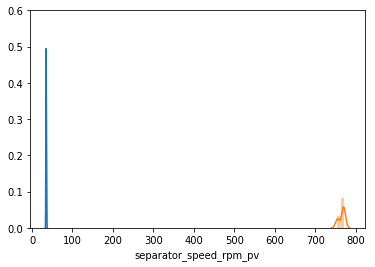

In [83]:
sns.distplot(dfg['mill_dp_mbar_pv'], label='mill_dp_mbar_pv')
sns.distplot(dfg['separator_speed_rpm_pv'], label='separator_speed_rpm_pv')


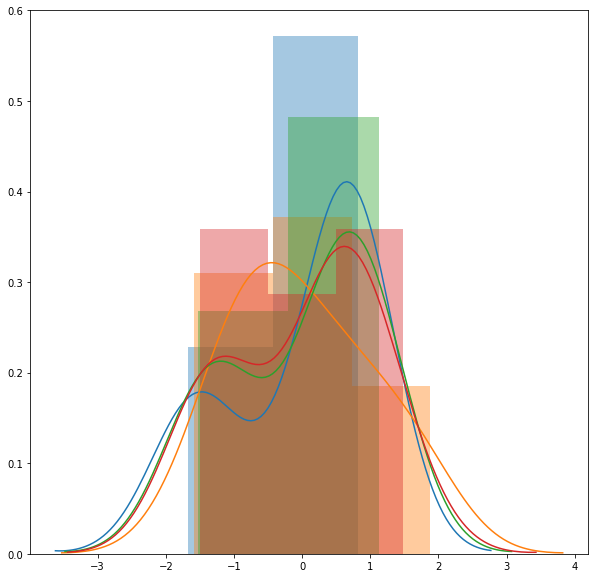

In [84]:
fig, ax = plt.subplots(figsize = (10,10))
for i in range(4):
    sns.distplot(x_sc[:, i])

In [32]:
final_preds = combined_pred(x_sc)

In [50]:
'''
import matplotlib.dates as mdates


fig,ax=plt.subplots(figsize = (16,8))

#plt.errorbar(y_st_preds, y_ts, fmt='o')
ax.plot(final_preds, '-r', label = 'predicted', zorder = 10)
ax.plot(y , '-k', alpha=0.5, label = 'true model', zorder = 10)
ax.legend()


#Set x-axis major ticks to yearly intervals
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute = 0))
# Format x-tick labels as the full year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.title('Predictions')
#plt.xlim(4000, 4100)
#plt.ylim(30,42)
'''

"\nimport matplotlib.dates as mdates\n\n\nfig,ax=plt.subplots(figsize = (16,8))\n\n#plt.errorbar(y_st_preds, y_ts, fmt='o')\nax.plot(final_preds, '-r', label = 'predicted', zorder = 10)\nax.plot(y , '-k', alpha=0.5, label = 'true model', zorder = 10)\nax.legend()\n\n\n#Set x-axis major ticks to yearly intervals\nax.xaxis.set_major_locator(mdates.MinuteLocator(byminute = 0))\n# Format x-tick labels as the full year\nax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))\n\nplt.title('Predictions')\n#plt.xlim(4000, 4100)\n#plt.ylim(30,42)\n"

## Final predictions Plot 

In [17]:
f_preds = combined_pred(x_ts_sc)

(2100, 2200)

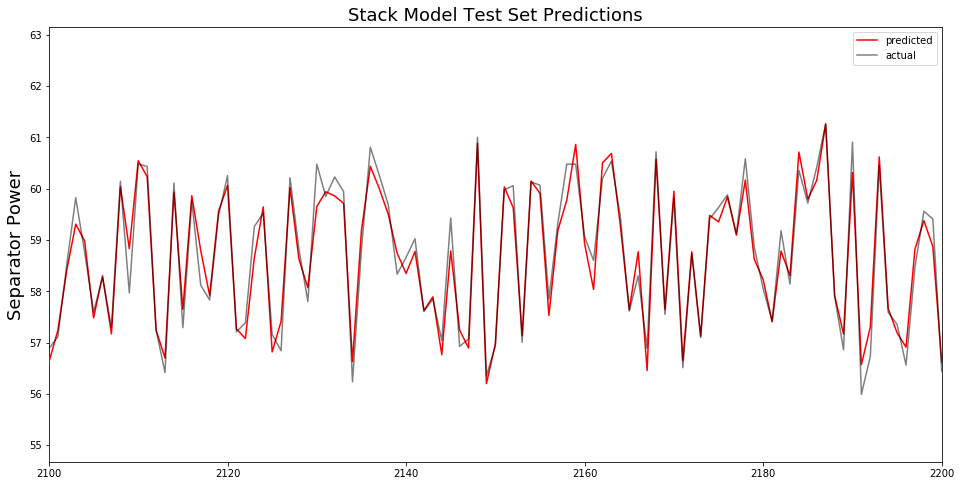

In [32]:


fig,ax=plt.subplots(figsize = (16,8))

#plt.errorbar(y_st_preds, y_ts, fmt='o')
ax.plot(f_preds, '-r', label = 'predicted', zorder = 10)
ax.plot(y_ts , '-k', alpha=0.5, label = 'actual', zorder = 10)
ax.legend()

'''
#Set x-axis major ticks to yearly intervals
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute = 0))
# Format x-tick labels as the full year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
'''
ax.set_ylabel('Separator Power',size =18)
plt.title('Stack Model Test Set Predictions', size=18)
plt.xlim(2100, 2200)
#plt.ylim(30,42)

In [33]:
fig.savefig('stack_B1_c1.png')

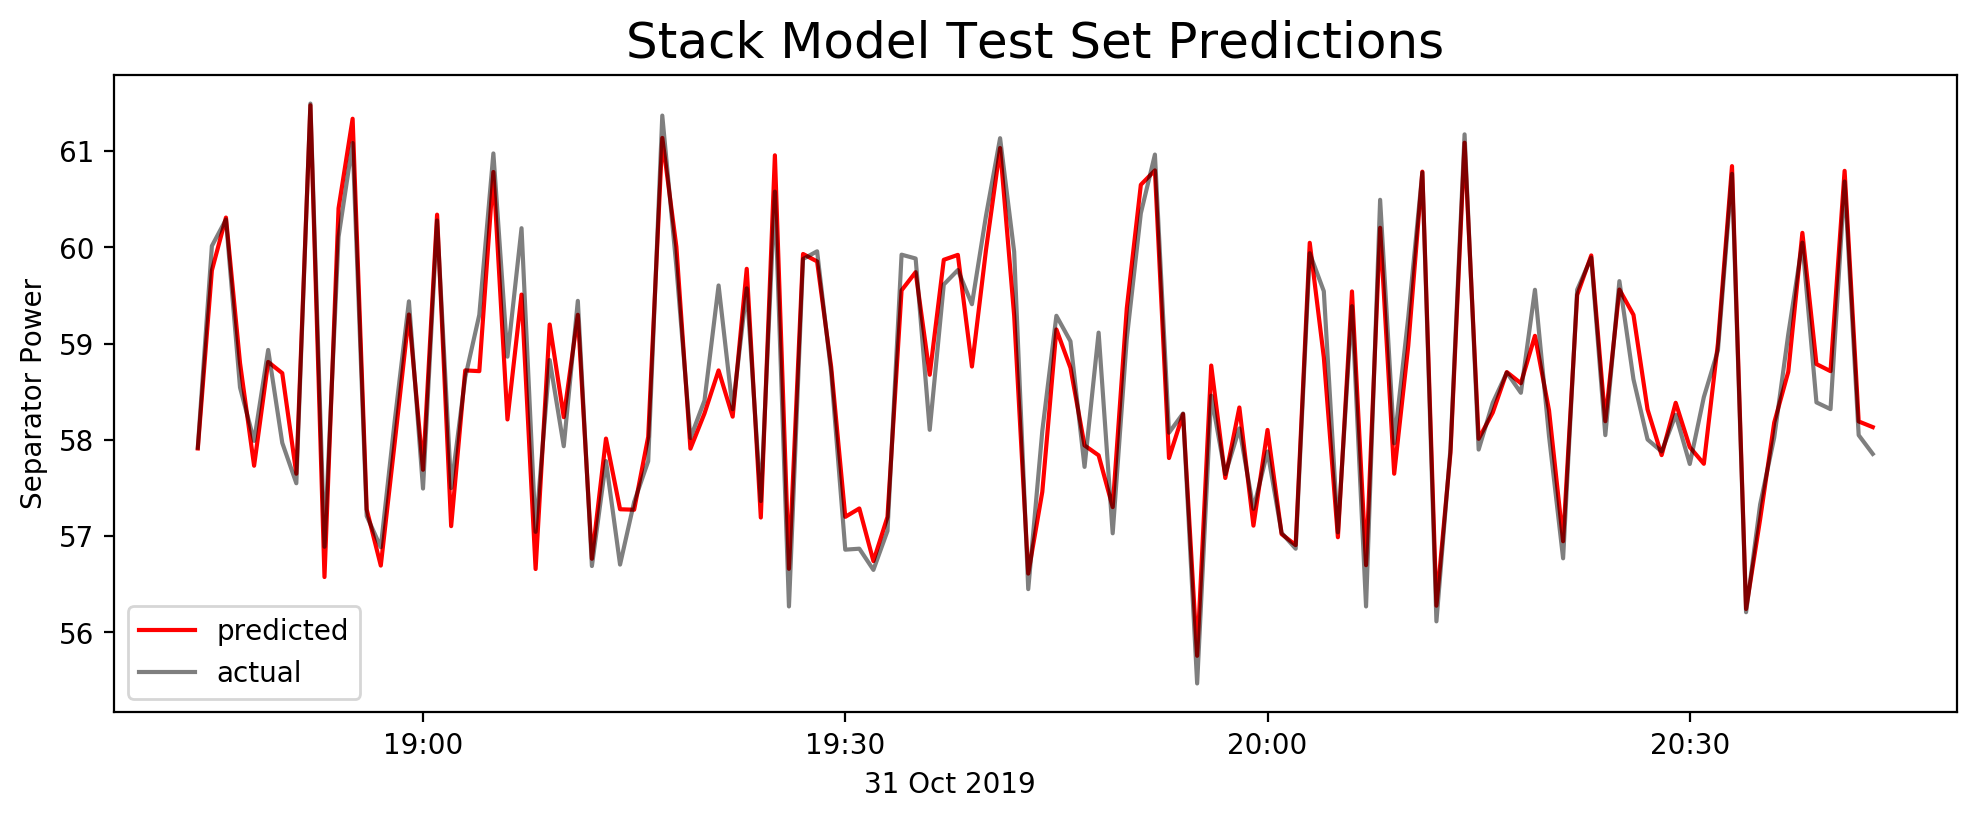

In [28]:
fig,ax=plt.subplots(figsize = (10,4), dpi=200)
#plt.errorbar(y_st_preds, y_ts, fmt='o')
ax.plot(dfc1.index[-120:], f_preds[-120:], '-r', label = 'predicted', zorder = 10)
ax.plot(dfc1.index[-120:], y_ts[-120:], '-k', alpha=0.5, label = 'actual', zorder = 10)
ax.legend(prop={'size': 10})
import matplotlib.dates as mdates
#Set x-axis major ticks to yearly intervals
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,30]))
# Format x-tick labels as the full year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.title('Stack Model Test Set Predictions', size = 18)
ax.set_ylabel('Separator Power',size =10)
for text in ax.get_xmajorticklabels():
   # text.set_rotation(45)
    text.set_size(10)
plt.tight_layout()
ax.set_xlabel('31 Oct 2019', horizontalalignment='right', size =10)
ax.tick_params(labelsize = 10)

In [29]:
fig.savefig('stack_B1_c1.png')

## Predict t+5

In [17]:

x_ts_sc

array([[ 2.22484962, -0.43580407,  0.73759582,  0.74751811],
       [ 1.0441515 , -0.34339267, -0.06258645, -0.05583668],
       [ 1.49297427, -0.21659564,  1.48036592,  1.40741669],
       ...,
       [-1.42043666,  2.10056645,  0.16706227, -0.27819381],
       [ 0.65459158,  1.5048353 , -0.61517869, -0.55434702],
       [-0.18047571, -0.78395864, -0.4106478 , -0.12397838]])

In [18]:
y_ts.shape

(10664,)

In [23]:
x_1=x_ts_sc[0].reshape(1,-1)

In [20]:
x_1

array([[ 2.22484962, -0.43580407,  0.73759582,  0.74751811]])

In [24]:
type(x_1)

numpy.ndarray

In [ ]:
'separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'lag1', 'lag2'

In [25]:
y_t1 = combined_pred(x_1)

In [26]:
y_t1

array([58.14721859])

In [27]:
y_test1= np.array([59.93, 59.93, 59.93, 59.93]).reshape(1, 4)

In [28]:
y_test1

array([[59.93, 59.93, 59.93, 59.93]])

In [29]:
y_t1_sc = sc.transform(y_test1)

In [48]:
y_t1_sc

array([[-30.09038944,  10.32475108,   0.94930324,   0.95552962]])

In [28]:
sep_speed=-0.6075
mill_dp = 0.2262
lag2 = -1.0352

In [30]:
x_2=np.array([-0.6075, 0.2262,  0.95, -1.0352]).reshape(1, 4)

In [31]:
y_t2 = combined_pred(x_2)

In [32]:
y_t2

array([58.58082862])

In [33]:
y_test1= np.array([58.58, 58.58,58.58, 58.58]).reshape(1, 4)

In [34]:
y_t2_sc = sc.transform(y_test1)
y_t2_sc

array([[-3.01791029e+01,  9.71728529e+00, -2.53073399e-02,
        -1.69132936e-02]])

In [35]:
x_3=np.array([-0.6075, 0.2262,  -1.95,  0.95]).reshape(1, 4)

In [36]:
y_t3 = combined_pred(x_3)

In [37]:
y_t3

array([57.10938864])

In [38]:
y_test1= np.array([57.10, 57.10,57.10, 57.10]).reshape(1, 4)

In [39]:
y_t3_sc = sc.transform(y_test1)
y_t3_sc

array([[-30.24049939,   9.08255683,  -1.08638853,  -1.07771961]])

In [40]:
x_3=np.array([-0.6075, 0.2262,  -1.08,  -1.95]).reshape(1, 4)

In [41]:
y_t4 = combined_pred(x_3)

In [42]:
y_t4

array([56.93082141])

In [43]:
y_test1= np.array([56.93, 56.93,56.93, 56.93]).reshape(1, 4)

In [44]:
y_t4_sc = sc.transform(y_test1)
y_t4_sc

array([[-30.24755168,   9.00964884,  -1.20826948,  -1.19956899]])

In [45]:
x_4=np.array([-0.6075, 0.2262,  -1.20,  -1.08]).reshape(1, 4)

In [46]:
y_t5 = combined_pred(x_4)

In [47]:
preds=[y_t1, y_t2, y_t3, y_t4, y_t5]

In [70]:
preds

[array([59.93947816]),
 array([58.58082862]),
 array([57.10938864]),
 array([56.93082141]),
 array([57.15746487])]

In [49]:
real=y_ts[:5]
real

array([57.695, 59.4  , 56.84 , 59.52 , 57.24 ])

(50, 70)

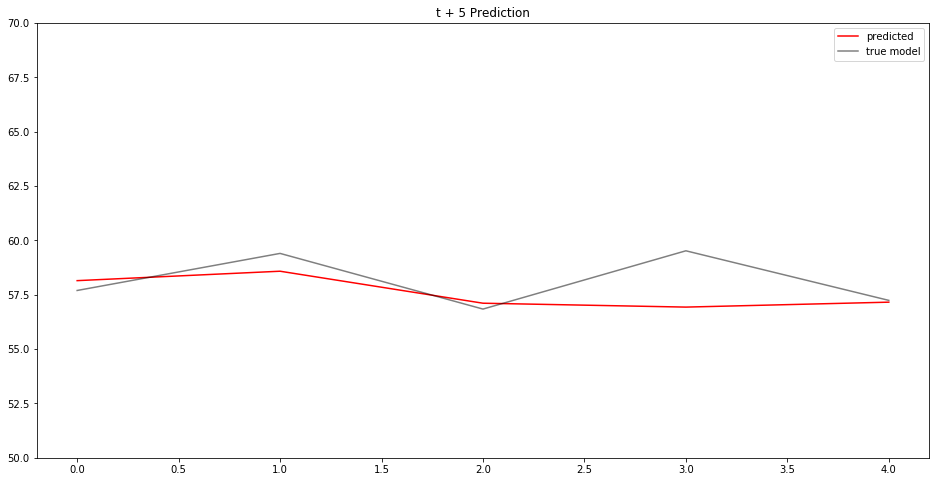

In [50]:

fig,ax=plt.subplots(figsize = (16,8))

#plt.errorbar(y_st_preds, y_ts, fmt='o')
ax.plot(preds, '-r', label = 'predicted', zorder = 10)
ax.plot(real , '-k', alpha=0.5, label = 'true model', zorder = 10)
ax.legend()

'''
#Set x-axis major ticks to yearly intervals
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute = 0))
# Format x-tick labels as the full year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
'''

plt.title('t + 5 Prediction')
#plt.xlim(1050, 1100)
plt.ylim(50,70)

In [52]:
fig.savefig('plot.png')